<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/NN/digits_recognition_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten digits classification using neural network
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [6]:
# image shape
X_train[0].shape

(28, 28)

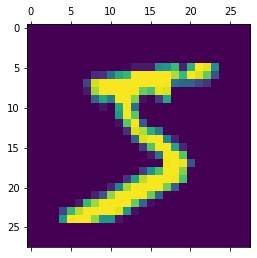

In [7]:
# first image in x_train
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [15]:
# scaling
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# flattened images means 2d array to 1d array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
X_train_flattened.shape

(60000, 784)

In [18]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
# 10 output and 784 input neurons sigmoid AF

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
# add optimizer, loss sparse_categorical_crossentropy: Computes the sparse categorical crossentropy loss.
# https://www.tensorflow.org/api_docs/python/tf/keras/losses

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4707 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3039 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2728 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9254


In [20]:
# evaluate accuracy on training dataset
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2675 - accuracy: 0.9265


[0.2675497531890869, 0.9265000224113464]

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.88527310e-02, 3.50789662e-07, 7.12603331e-02, 9.59097624e-01,
       2.74187326e-03, 1.23706579e-01, 1.87221406e-06, 9.99753714e-01,
       1.09494686e-01, 7.80842662e-01], dtype=float32)

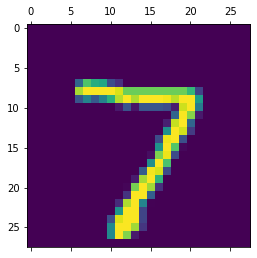

In [22]:

plt.matshow(X_test[0])

In [23]:
# np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])

7

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    1,    0,    6,    7,    3,    1,    1],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,    9,  934,   11,    7,    3,   12,   10,   38,    5],
       [   3,    0,   25,  905,    1,   32,    2,    9,   23,   10],
       [   1,    1,    7,    0,  903,    0,   11,    3,    9,   47],
       [   7,    2,    3,   27,    9,  789,   15,    5,   28,    7],
       [   7,    3,    7,    1,    7,   13,  917,    2,    1,    0],
       [   1,    5,   25,    6,    9,    1,    0,  934,    3,   44],
       [   5,    7,    7,   17,    9,   29,    9,    9,  873,    9],
       [   8,    6,    2,    7,   18,    7,    0,   11,    8,  942]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

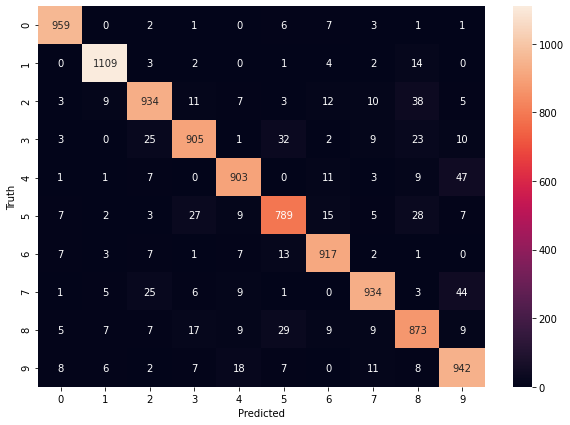

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
# Add a hideen layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2742 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1236 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0852 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0496 - accuracy: 0.9845


In [30]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9765


[0.07493256032466888, 0.9764999747276306]

Text(69.0, 0.5, 'Truth')

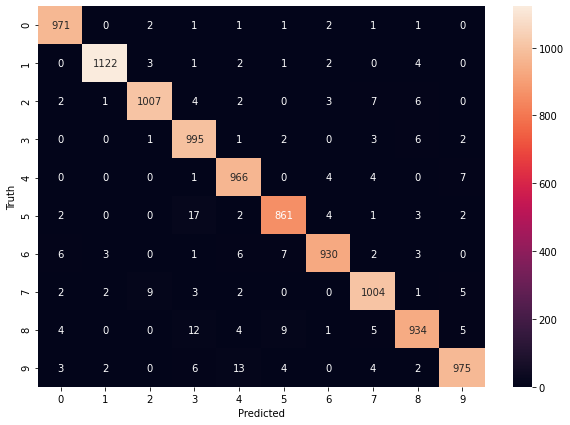

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
# Using Flatten layer so that we don't have to call .reshape on input dataset
# keras.layers.Flatten for flattened only input_shape 28 X 28
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1234 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0882 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0420 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0337 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0286 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 0.9771


[0.08201317489147186, 0.9771000146865845]

In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9771


[0.08201317489147186, 0.9771000146865845]